In [60]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from hmmlearn import hmm
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


df=pd.read_csv("price_smp.csv")
data2 = np.loadtxt("price_smp.csv",encoding='latin-1', delimiter=',', skiprows=1, usecols=(16, 17, 18), dtype=float)
df.head()

,day,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,1/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [61]:
feats= ['16','17','18']
df[feats].head()


,16,17,18
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1010.8,1010.8,1010.8
4,1061.5,1061.5,1061.5


Model is not converging.  Current: -3476.216600132011 is not greater than -3476.215979869108. Delta is -0.0006202629028848605
Model is not converging.  Current: -2005.00361123356 is not greater than -2005.003610213757. Delta is -1.0198029940511333e-06


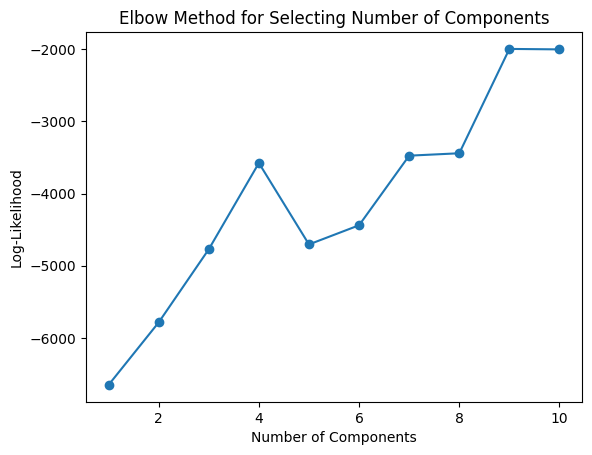

In [62]:
from hmmlearn.hmm import GaussianHMM

# Giả sử bạn có dữ liệu chuỗi thời gian trong mảng numpy 'data'
# data = np.array([...])

# Danh sách các số lượng component để thử
n_components_range = range(1, 11)
log_likelihoods = []

for n_components in n_components_range:
    model = GaussianHMM(n_components=n_components, n_iter=1000, random_state=42)
    model.fit(data2)
    log_likelihoods.append(model.score(data2))

# Vẽ đồ thị số lượng component vs. log-likelihood
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Log-Likelihood')
plt.title('Elbow Method for Selecting Number of Components')
plt.show()

In [63]:
# Khởi tạo HMM
model = hmm.GaussianHMM(n_components=5, covariance_type="full", n_iter=1000)

# Huấn luyện HMM với dữ liệu quan sát
model.fit(data2)

# In ra các tham số của mô hình sau khi huấn luyện
print("Start probabilities: ", model.startprob_)
print("Transition matrix: ", model.transmat_)
print("Means: ", model.means_)
print("Covariances: ", model.covars_)



Model is not converging.  Current: 2991.3086192684045 is not greater than 4360.60516095994. Delta is -1369.2965416915354


Start probabilities:  [3.10182354e-012 1.83498260e-023 9.99909175e-001 9.08254055e-005
 1.52780850e-230]
Transition matrix:  [[1.06096357e-11 9.89618886e-15 9.98112245e-01 1.88775514e-03
  1.21690984e-11]
 [3.60149890e-10 8.83891814e-01 1.66452948e-06 3.49413501e-03
  1.12612386e-01]
 [1.49321163e-02 6.36324136e-03 9.73112221e-01 4.88198724e-05
  5.54360106e-03]
 [1.99641294e-04 3.76702523e-01 5.78299431e-01 4.47979697e-02
  4.35562461e-07]
 [1.35401937e-10 8.03519936e-10 7.88924488e-01 2.02370208e-02
  1.90838491e-01]]
Means:  [[ 999.70015264  999.6801532   999.64015432]
 [1412.05208382 1412.05208382 1412.05208382]
 [1016.00722879 1016.00722879 1016.00722879]
 [1068.40140417 1068.40140417 1068.40140417]
 [1303.69643168 1303.69643168 1303.69643168]]
Covariances:  [[[2261.14706018 2264.22697739 2263.71899765]
  [2264.22697739 2267.31249445 2266.80371476]
  [2263.71899765 2266.80371476 2266.29733504]]

 [[9397.88850027 9397.88850027 9397.88850027]
  [9397.88850027 9397.88850027 9397.8885

In [64]:
# Dự đoán trạng thái ẩn cho các quan sát hiện có
hidden_states = model.predict(data2)
print("Hidden states: ", hidden_states)

# Lấy mẫu mới từ mô hình đã huấn luyện
X, Z = model.sample(5)  # Lấy mẫu 5 quan sát mới
print("Sampled observations: ", X)
print("Sampled hidden states: ", Z)

Hidden states:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 3 1 1 4 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 4 2 2 4 4 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Sampled observations:  [[1040.87309103 1040.87309103 1040.87309103]
 [1108.16326757 1108.16326757 1108.16326757]
 [1051.60024036 1051.60024036 1051.60024036]
 [1048.91864715 1048.91864715 1048.91864715]
 [ 981.63726889  981.63726889  981.63726

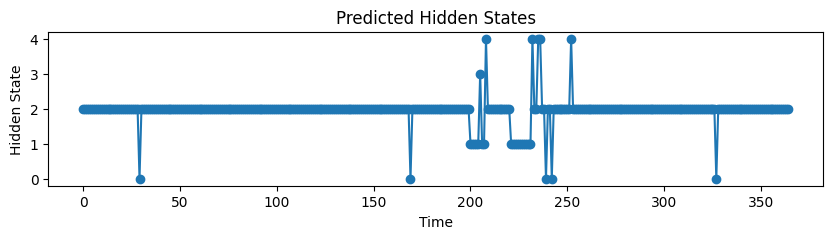

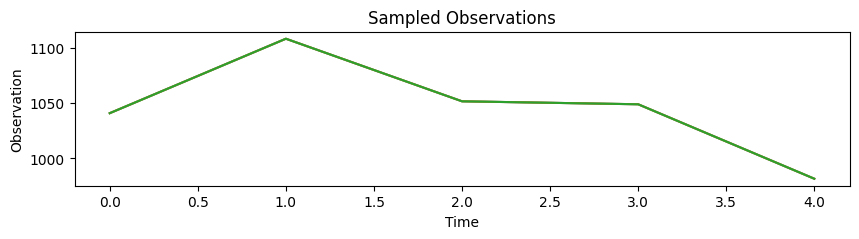

In [65]:
# Vẽ các trạng thái ẩn dự đoán
def plot_hidden_states(hidden_states, title):
    plt.figure(figsize=(10, 2))
    plt.plot(hidden_states, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Hidden State")
    plt.show()

plot_hidden_states(hidden_states, "Predicted Hidden States")

# Vẽ các quan sát mẫu
def plot_observations(observations, title):
    plt.figure(figsize=(10, 2)) 
    plt.plot(observations)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Observation")
    plt.show()

plot_observations(X, "Sampled Observations")

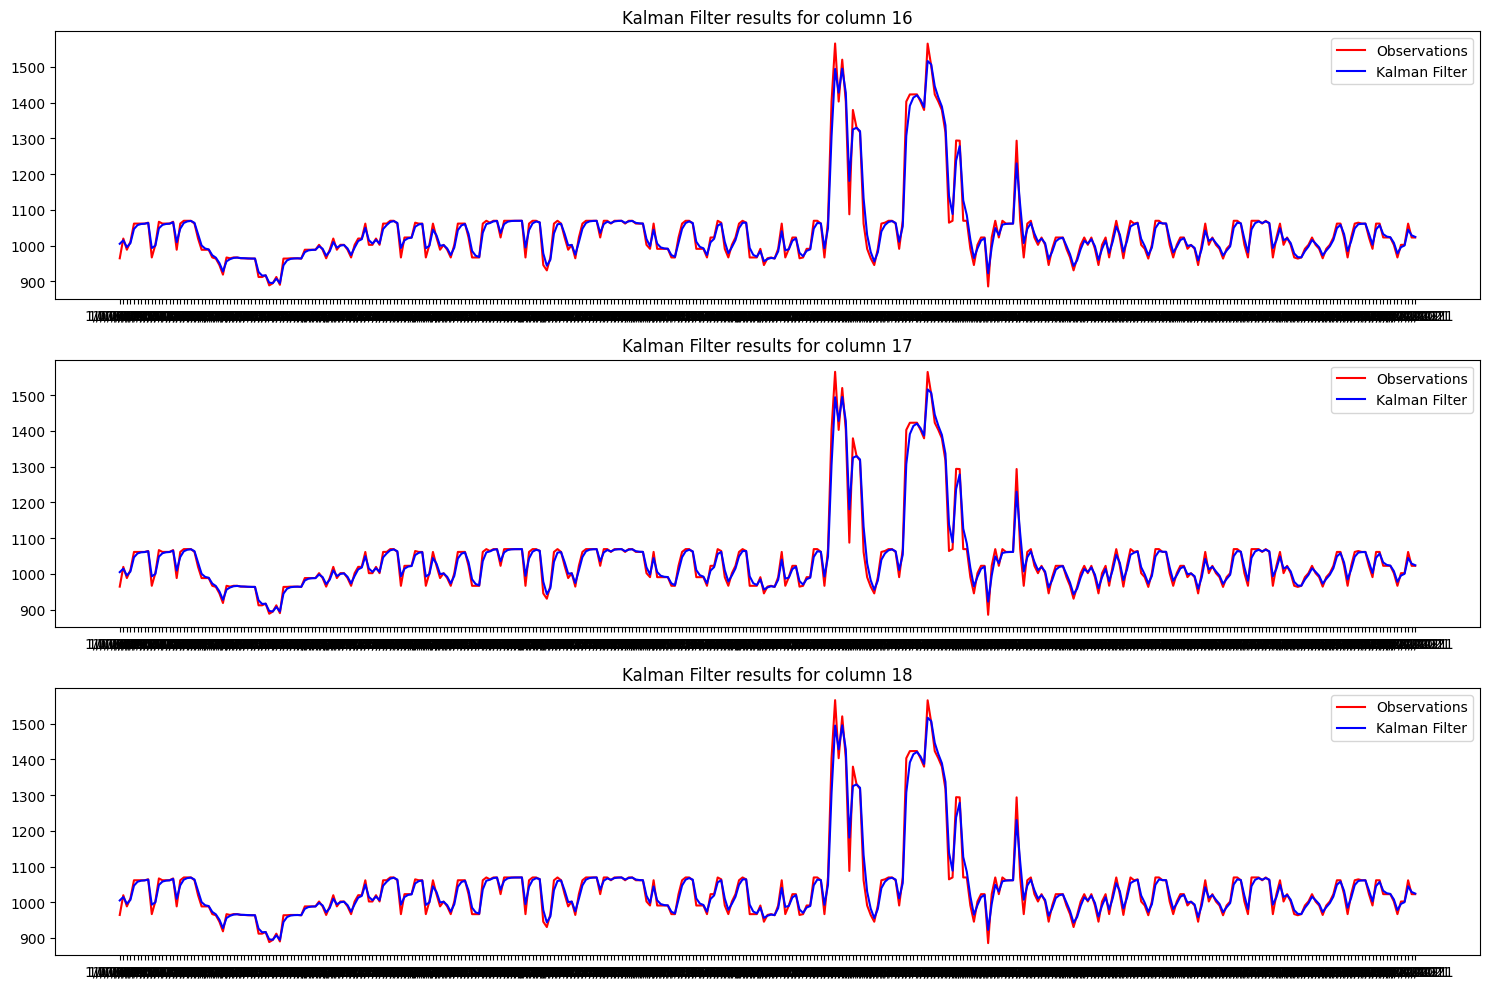

Column 16 - MSE: 293.5272, MAE: 10.2971, RMSE: 17.1326
Column 17 - MSE: 293.5344, MAE: 10.2975, RMSE: 17.1328
Column 18 - MSE: 293.5359, MAE: 10.2976, RMSE: 17.1329


In [66]:
from pykalman import KalmanFilter
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Lấy dữ liệu cột 16, 17, 18
observations = df[feats].values

# Định nghĩa mô hình Kalman Filter
kf = KalmanFilter(initial_state_mean=np.mean(observations, axis=0),
                  n_dim_obs=3)

# Ước lượng trạng thái
state_means, state_covariances = kf.em(observations).filter(observations)
# Trực quan hóa kết quả cho từng cột
plt.figure(figsize=(15, 10))

for i, col in enumerate(feats):
    plt.subplot(len(feats), 1, i+1)
    plt.plot(df['day'], observations[:, i], 'r', label='Observations')
    plt.plot(df['day'], state_means[:, i], 'b', label='Kalman Filter')
    plt.title(f'Kalman Filter results for column {col}')
    plt.legend()

plt.tight_layout()
plt.show()
# Tính toán các chỉ số đánh giá
for i, col in enumerate(feats):
    mse = mean_squared_error(observations[:, i], state_means[:, i])
    mae = mean_absolute_error(observations[:, i], state_means[:, i])
    rmse = np.sqrt(mse)
    print(f'Column {col} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}')